In [1]:
#upload the files to the system
!rm -r sample_data
!wget -q https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/SchneiderElectricEuropeanHackathon22/test.csv
!wget -q https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/SchneiderElectricEuropeanHackathon22/train.csv
!wget -q https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/SchneiderElectricEuropeanHackathon22/train_test_data.zip
!unzip -qq /content/train_test_data.zip
!rm /content/train_test_data.zip

In [2]:
#install aditionall libraries
!pip install basemap
!pip install basemap-data-hires

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 3.3 MB/s 
     |████████████████████████████████| 6.3 MB 35.1 MB/s 
     |████████████████████████████████| 46 kB 3.2 MB/s 
     |████████████████████████████████| 30.5 MB 158 kB/s 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 91.1 MB 74 kB/s 


In [3]:
#import packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pandas as pd
import numpy as np

from mpl_toolkits.basemap.test import Basemap

In [4]:
# Set paths to data
INPUT = '/content/'


train_image_label_path = os.path.join(INPUT,
                             'train.csv')
test_image_label_path = os.path.join(INPUT,
                                    'test.csv' )
jpg_image_path = str(os.path.join(INPUT,
                             'train_test_data','train','{}.png'))
output_data_path = str(os.path.join(INPUT,
                            'processed','{}'))
output_figure_path = str(os.path.join(INPUT,
                            'reports',
                            'figures','{}'))

In [5]:
# read the csv with the information of the train 
df_train = pd.read_csv(train_image_label_path)
df_train.head(10)

,label,latitude,longitude,year,example_path
0,0,-2.051853,111.826093,2001,train_test_data/train/1297.png
1,2,-1.989349,105.309496,2013,train_test_data/train/1199.png
2,0,1.223256,100.702217,2014,train_test_data/train/1348.png
3,0,-2.342948,103.890226,2008,train_test_data/train/2214.png
4,0,-0.126555,101.758175,2011,train_test_data/train/2220.png
5,2,-1.841261,101.191444,2016,train_test_data/train/731.png
6,1,-0.837216,102.906139,2016,train_test_data/train/1355.png
7,2,-0.213295,109.562957,2001,train_test_data/train/322.png
8,0,1.349092,102.278238,2014,train_test_data/train/2194.png
9,0,1.246842,109.641403,2003,train_test_data/train/1418.png


# Exploratory data analysis

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   label         1714 non-null   int64  
 1   latitude      1714 non-null   float64
 2   longitude     1714 non-null   float64
 3   year          1714 non-null   int64  
 4   example_path  1714 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 67.1+ KB


The train set contains additional information from the 1714 images at the training dataset. Each column has the following information:


* latitude: Where the photo latitude was taken.
* longitude: Where the photo longitude was taken.
* year: Year, in which the photo was taken.
* example_path: Path where the sample image is located.
* label: In this column you will have the following categories:
  * 'Plantation':Encoded with number 0, Network of rectangular plantation blocks, connected by a well-defined road grid. In hilly areas the layout of the plantation may follow topographic features. In this group you can find: Oil Palm Plantation, Timber Plantation and Other large-scale plantations.
  * 'Grassland/Shrubland': Encoded with number 1, Large homogeneous areas with few or sparse shrubs or trees, and which are generally persistent. Distinguished by the absence of signs of agriculture, such as clearly defined field boundaries.
 * 'Smallholder Agriculture': Encoded with number 2, Small scale area, in which you can find deforestation covered by agriculture, mixed plantation or oil palm plantation.

In [7]:
# define a map that translate each label to its category
def label_to_cat(label):
  if label == 0:
    category = "Plantation"
  elif label == 1:
    category = "Grassland"
  elif label == 2:
    category = "Agriculture"
  return category

#add a new column to the data frame with the info from each category
df_train["Category"] = df_train["label"].apply(label_to_cat)

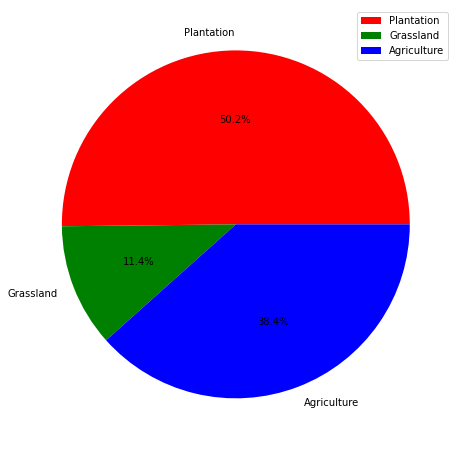

In [8]:
# pie chart with the % of the type of plantations
y = [len(df_train[df_train["label"] == 0]), len(df_train[df_train["label"] == 1]), 
                 len(df_train[df_train["label"] == 2])]
mylabels = ['Plantation', 'Grassland', 'Agriculture']

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(y, labels=mylabels, autopct='%1.1f%%', colors=["r", "g", "b"])
ax.axis()

plt.legend()
plt.show()

The distribution of the categories is unbalanced, with a smaller quantity of grassland pictures.

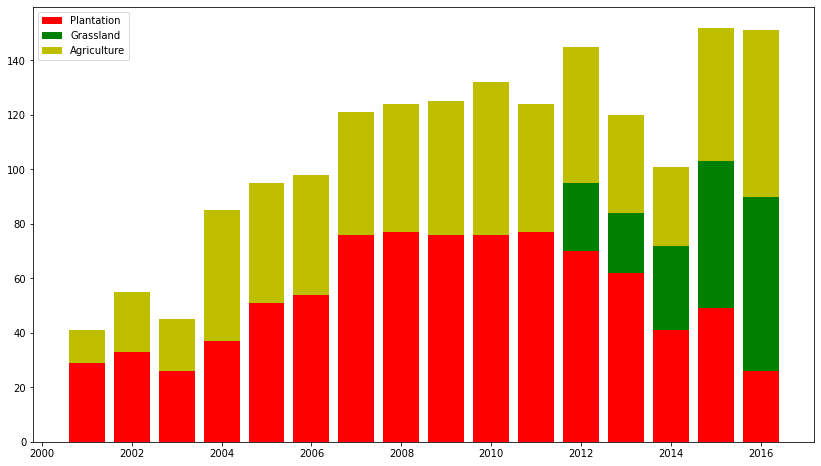

In [9]:
#bar plot with the quantity of pictures at each category by year

plant_count = []
grass_count = []
agr_count = []

for year in range(2001, 2017): 
  plant_count.append(len(df_train[ (df_train["label"] == 0) & (df_train["year"]== year) ]))
  grass_count.append(len(df_train[ (df_train["label"] == 1) & (df_train["year"]== year) ]))
  agr_count.append(len(df_train[ (df_train["label"] == 2) & (df_train["year"]== year) ]))

labels = list(range(2001, 2017))
fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(labels, plant_count, label='Plantation', color="r")
ax.bar(labels, grass_count, label='Grassland', color="g", bottom=plant_count)
ax.bar(labels, agr_count, label='Agriculture', color="y", bottom=[sum(x) for x in zip(plant_count, grass_count)])

ax.legend()

plt.show()

The set contains images between 2001 and 2016. Most of the pictures are from the period 2007-2016, with approximately 120 pictures per year. Grassland pictures where taken after 2012.

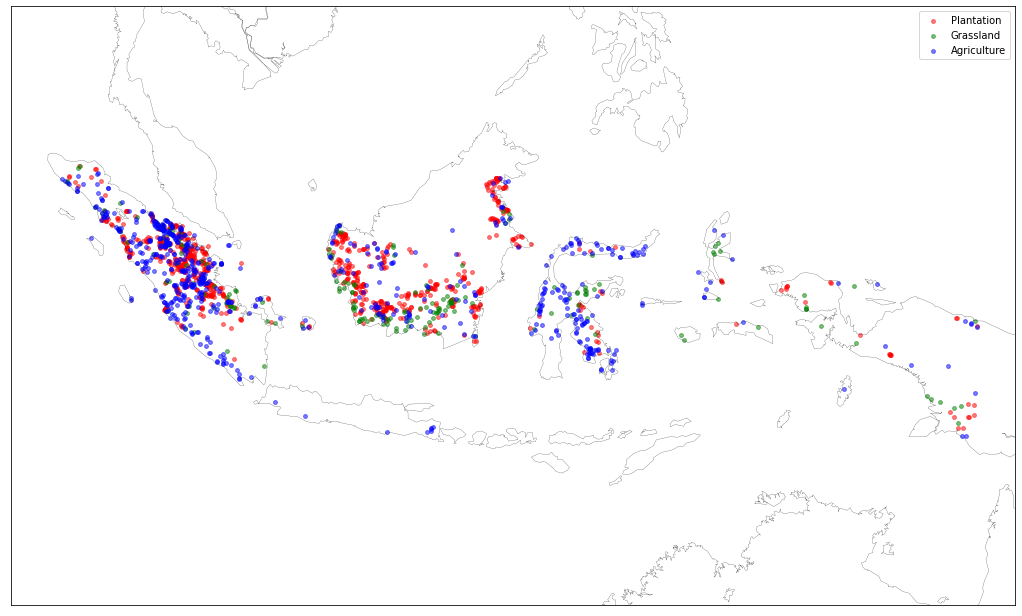

In [10]:
#map with the position where the pictures where taken by category

lons = df_train['longitude'][:]
lats = df_train['latitude'][:]

lons0 = df_train[df_train['label']==0]['longitude'][:]
lons1 = df_train[df_train['label']==1]['longitude'][:]
lons2 = df_train[df_train['label']==2]['longitude'][:]

lats0 = df_train[df_train['label']==0]['latitude'][:]
lats1 = df_train[df_train['label']==1]['latitude'][:]
lats2 = df_train[df_train['label']==2]['latitude'][:]

fig = plt.figure(figsize=(18, 15))

m = Basemap (projection='aea', width=5500000, height=3280000, resolution= 'l', lat_0 = -2.051853, lon_0 = 118.026093)
x, y = m(lons,lats)
x0,y0 = m (lons0, lats0)
x1,y1 = m (lons1, lats1)
x2,y2 = m (lons2, lats2)

m.drawcoastlines(linewidth=0.2)

m.scatter(x0, y0, 15, marker='o', color='r', alpha =0.5, label="Plantation")
m.scatter(x1, y1, 15, marker='o', color='g', alpha =0.5, label="Grassland")
m.scatter(x2, y2, 15, marker='o', color='b', alpha =0.5, label="Agriculture")

plt.legend()
plt.show()

The pictures come from Indonesia. Are mainly concentrated in the regions of Sumatra, Kalimantan and Celelebes. All the categories posses a good grade of dispersion. We offer the plots with the information from each year.

In [ ]:
os.mkdir("/content/maps")
for year in range(2001, 2017):


  lons = df_train[df_train["year"] == year]['longitude'][:]
  lats = df_train[df_train["year"] == year]['latitude'][:]

  lons0 = df_train[(df_train['label']==0) & (df_train["year"] == year)]['longitude'][:]
  lons1 = df_train[(df_train['label']==1) & (df_train["year"] == year)]['longitude'][:]
  lons2 = df_train[(df_train['label']==2) & (df_train["year"] == year)]['longitude'][:]

  lats0 = df_train[(df_train['label']==0) & (df_train["year"] == year)]['latitude'][:]
  lats1 = df_train[(df_train['label']==1) & (df_train["year"] == year)]['latitude'][:]
  lats2 = df_train[(df_train['label']==2) & (df_train["year"] == year)]['latitude'][:]

  fig = plt.figure(figsize=(12, 10))

  m = Basemap (projection='aea', width=5500000, height=3280000, resolution= 'l', lat_0 = -2.051853, lon_0 = 118.026093)
  x, y = m(lons,lats)
  x0,y0 = m (lons0, lats0)
  x1,y1 = m (lons1, lats1)
  x2,y2 = m (lons2, lats2)

  # full scale will be overkill
  m.drawcoastlines( linewidth=0.5)  # add coastlines

  m.scatter(x0, y0, 15, marker='o', color='r', alpha =1, label="Plantation")
  m.scatter(x1, y1, 15, marker='o', color='g', alpha =1, label="Grassland")
  m.scatter(x2, y2, 15, marker='o', color='b', alpha =1, label="Agriculture")

  plt.title(year)
  plt.legend()
  plt.savefig("/content/maps/{}.jpg".format(year))

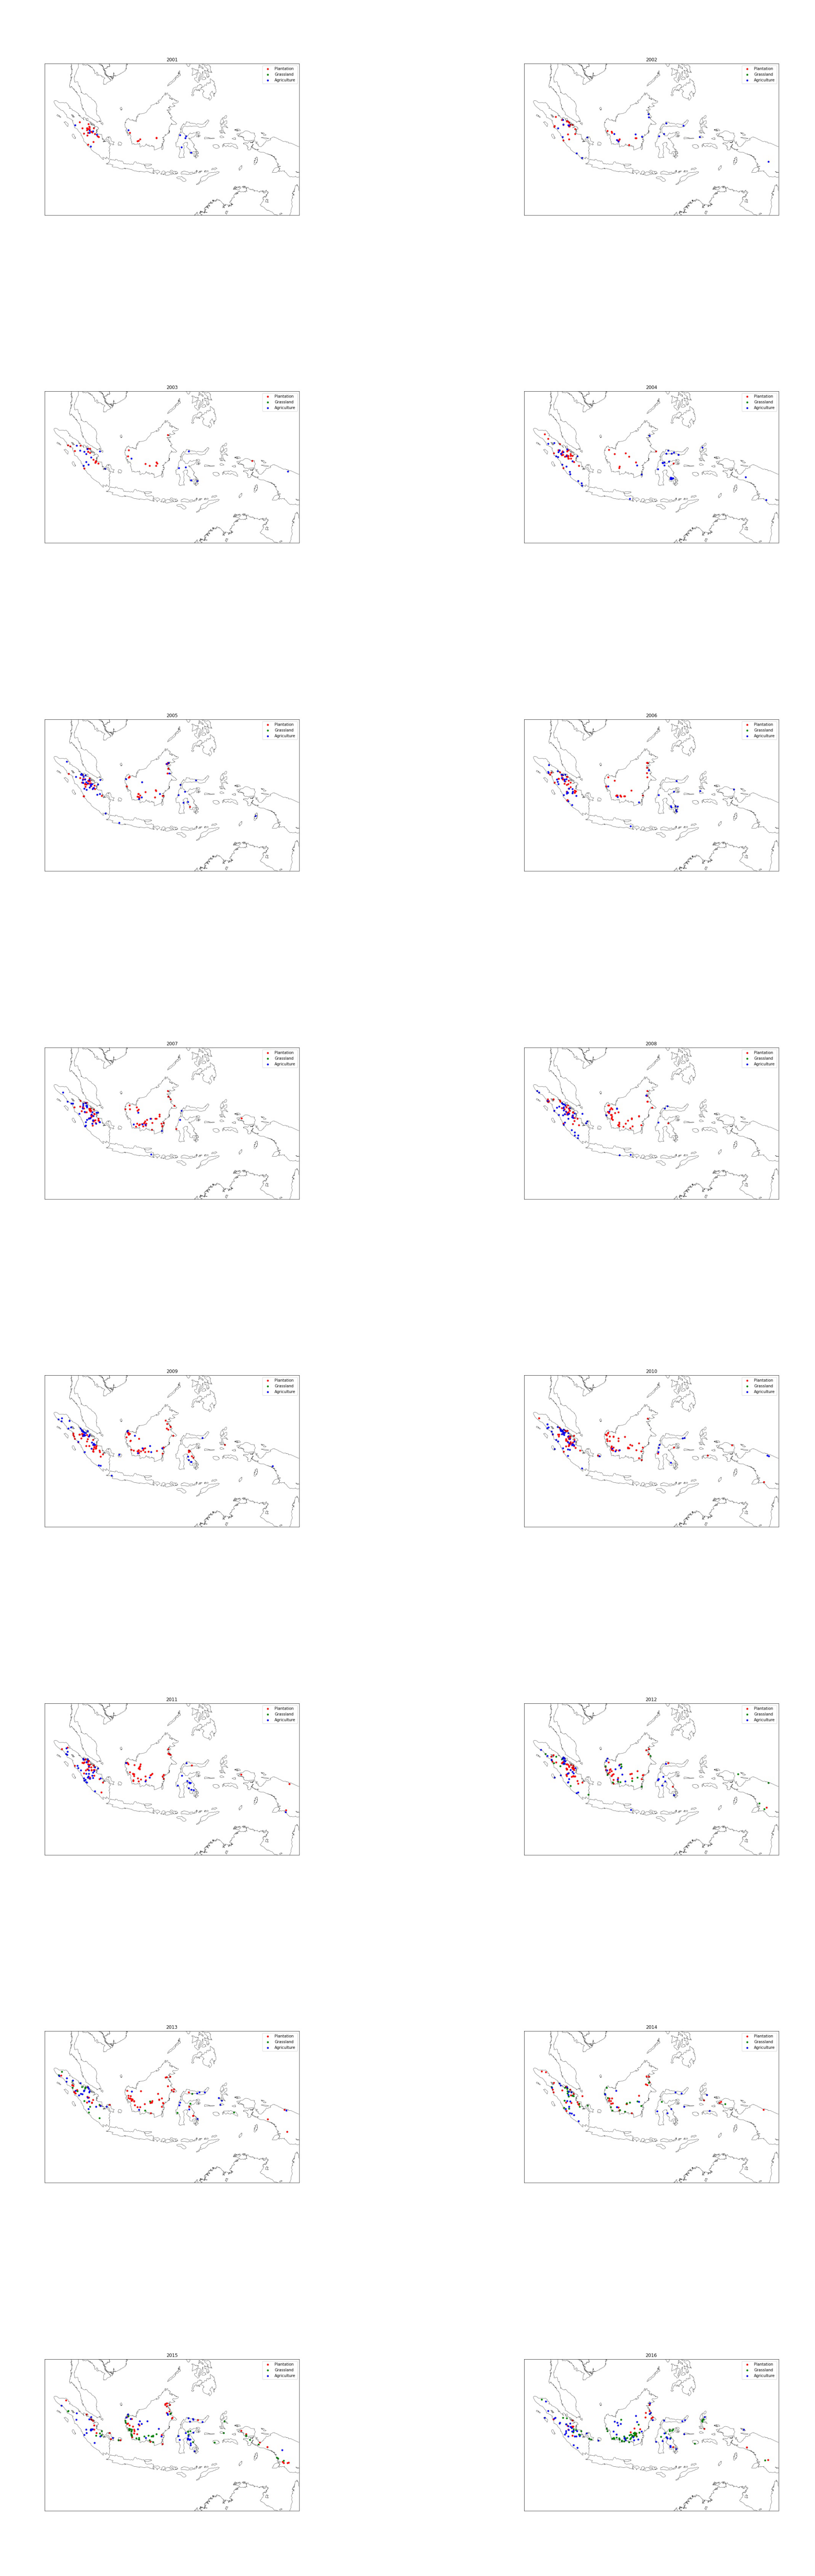

In [12]:
plt.figure(figsize=(30,90))
for n in range(16):
  ax = plt.subplot(8,2, n+1)
  
  img = mpimg.imread("/content/maps/{}.jpg".format(2001+n))
  plt.imshow(img)  
  plt.axis('off')
  